L'objectif est de faire du clustering sur des time series afin d'en séparer les groupes.

In [1]:
import numpy
import matplotlib.pyplot as plt²a

In [49]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler

In [293]:
from scipy.signal import savgol_filter

Nous avons 100 time series.

In [11]:
data = CachedDatasets().load_dataset("Trace")

Dans ce dataset nous avons déjà des classes attribuées à chaque time series. En réalité il ne s'agit pas vraiment de clustering pur dans presque tous les exemples cités sur internet. Il s'agit plutôt de classification "cachée".

Dans un premier temps affichons toutes les time series.

In [50]:
classes = data[1]; list_col = ['r', 'b', 'g', 'y'];
tsdata = data[0]

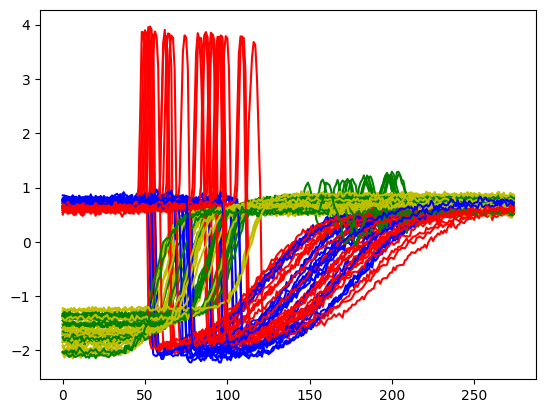

In [51]:
for i in range(len(data[0])):
    plt.plot(tsdata[i], color=list_col[classes[i]-1])
plt.show()

Nous avons donc 4 groupes distincts présents dans les données de base. Sans les afficher, voilà ce que cela donne :

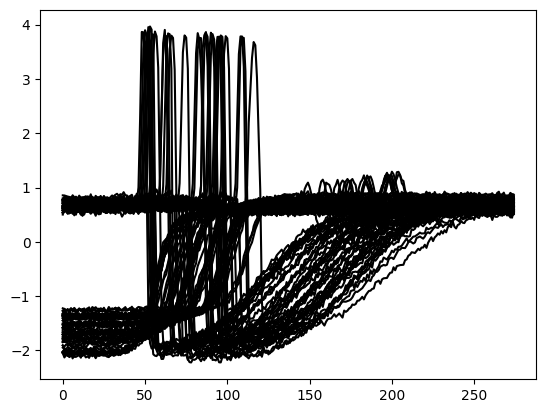

In [52]:
for i in range(len(data[0])):
    plt.plot(tsdata[i], color='k')
plt.show()

On peut donc essayer de trouver une méthode qui discrime proprement les groupes.

Le package tslearn offre principalmeent 2 méthodes de clustering, à savoir KernelKMeans et TimeSeriesKMeans. L'on peut trouver d'autres méthodes dans d'autres packages, comme pyts.

# Kernel $k$ means

In [54]:
from tslearn.clustering import KernelKMeans

In [61]:
gak_km = KernelKMeans(n_clusters=4,
                      kernel="gak",
                      kernel_params={"sigma": "auto"},
                      n_init=40,
                      verbose=True)

pred_group = gak_km.fit_predict(tsdata)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    4.4s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    6.3s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    8.1s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:   10.3s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:   12.2s


Init 1
132.582 --> 62.936 --> 57.122 --> 54.383 --> 52.148 --> 51.319 --> 51.319 --> 
Init 2
124.245 --> 58.960 --> 52.971 --> 51.867 --> 51.448 --> 51.319 --> 51.319 --> 
Init 3
132.742 --> 65.129 --> 54.067 --> 52.293 --> 51.448 --> 51.319 --> 51.319 --> 
Init 4
136.778 --> 92.215 --> 74.248 --> 58.535 --> 52.971 --> 51.867 --> 51.448 --> 51.319 --> 51.319 --> 
Init 5
133.796 --> 64.955 --> 51.696 --> 51.319 --> 51.319 --> 
Init 6
141.019 --> 82.189 --> 57.188 --> 51.726 --> 51.319 --> 51.319 --> 
Init 7
135.041 --> 79.920 --> 52.293 --> 51.448 --> 51.319 --> 51.319 --> 
Init 8
Resumed because of empty cluster
Init 8
123.366 --> 65.911 --> 60.951 --> 60.951 --> 
Init 9
134.107 --> 71.034 --> 67.505 --> 67.505 --> 
Init 10
136.804 --> 88.269 --> 63.092 --> 57.640 --> 52.085 --> 51.350 --> 51.319 --> 51.319 --> 
Init 11
137.495 --> 69.680 --> 53.140 --> 51.448 --> 51.319 --> 51.319 --> 
Init 12
133.930 --> 86.559 --> 73.469 --> 60.320 --> 54.824 --> 52.239 --> 51.448 --> 51.319 --> 51.

À l'issue de cet algorithme, nous avons extrait des potentiels pour les 100 time series considérées initialement.

In [62]:
pred_group

array([0, 1, 2, 2, 0, 3, 3, 0, 1, 3, 2, 2, 2, 3, 2, 1, 3, 1, 2, 2, 3, 3,
       2, 0, 1, 1, 2, 3, 1, 3, 1, 0, 2, 3, 0, 1, 0, 1, 0, 0, 2, 3, 3, 2,
       2, 1, 2, 2, 3, 0, 2, 3, 0, 0, 2, 0, 0, 0, 0, 1, 3, 1, 2, 2, 3, 0,
       1, 1, 2, 2, 0, 3, 0, 0, 2, 3, 0, 1, 2, 3, 0, 3, 1, 3, 3, 3, 3, 1,
       1, 0, 2, 3, 2, 1, 2, 1, 1, 3, 1, 0])

Nous pouvons comparer les résultats obtenus avec la réalités.

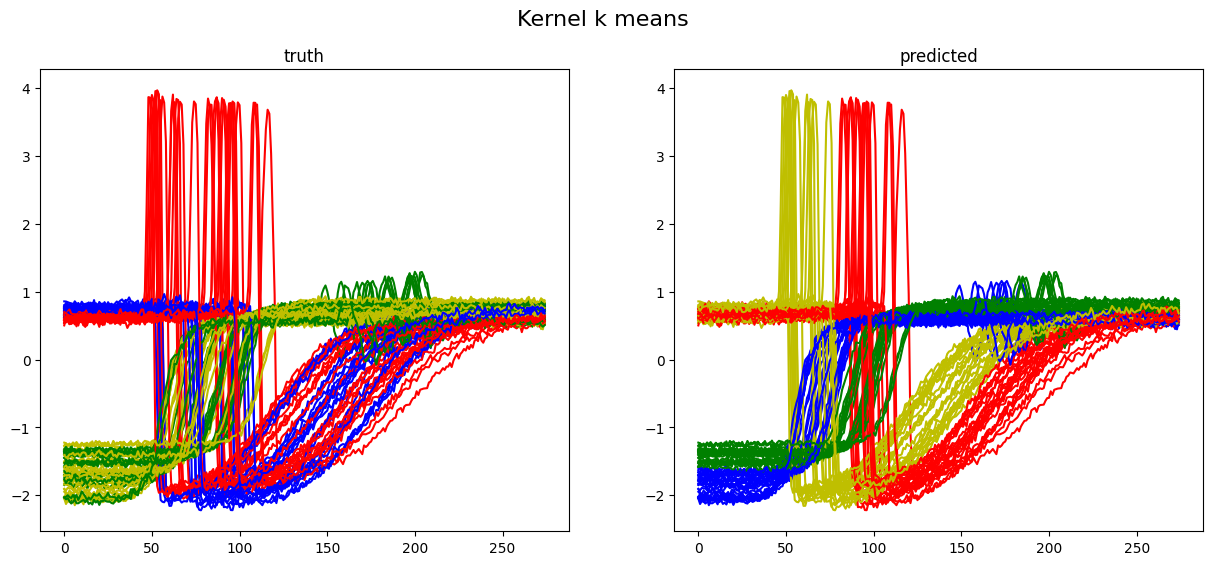

In [75]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Kernel k means', fontsize=16)
ax1.set_title('truth')
ax2.set_title('predicted')
for i in range(len(tsdata)):
    ax1.plot(tsdata[i], color=list_col[classes[i]-1])
    ax2.plot(tsdata[i], color=list_col[pred_group[i]-1])

On voit bien que cette méthode a du mal à discriminer véritablement les groupes proches. Tentons d'autres approches.

In [68]:
km = TimeSeriesKMeans(n_clusters=4, verbose=True)
pred_lab_km = km.fit_predict(tsdata)

71.947 --> 39.123 --> 38.789 --> 38.531 --> 38.459 --> 38.459 --> 


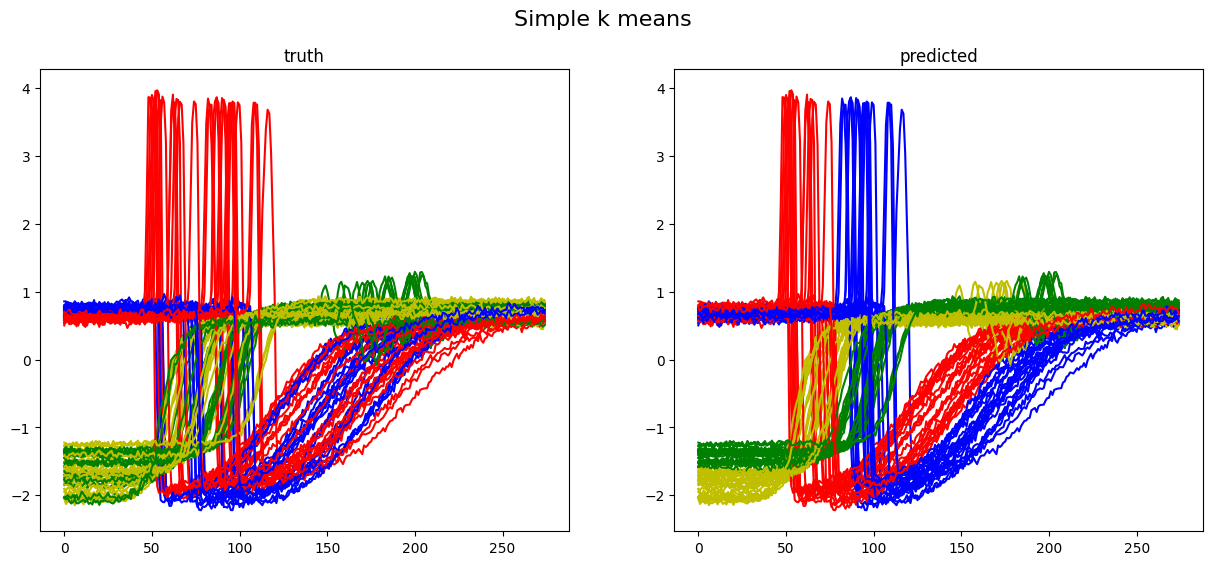

In [76]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Simple k means', fontsize=16)
ax1.set_title('truth')
ax2.set_title('predicted')
for i in range(len(tsdata)):
    ax1.plot(tsdata[i], color=list_col[classes[i]-1])
    ax2.plot(tsdata[i], color=list_col[pred_lab_km[i]-1])

In [72]:
km_dtw = TimeSeriesKMeans(n_clusters=4,
                          n_init=2,
                          metric="dtw",
                          verbose=True,
                          max_iter_barycenter=10)
pred_lab_dtw = km_dtw.fit_predict(tsdata)

Init 1


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s


1.354 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s


0.556 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s


0.537 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s


0.533 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s


0.533 --> 
Init 2


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s


1.415 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s


0.601 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s


0.563 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s


0.541 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s


0.541 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s


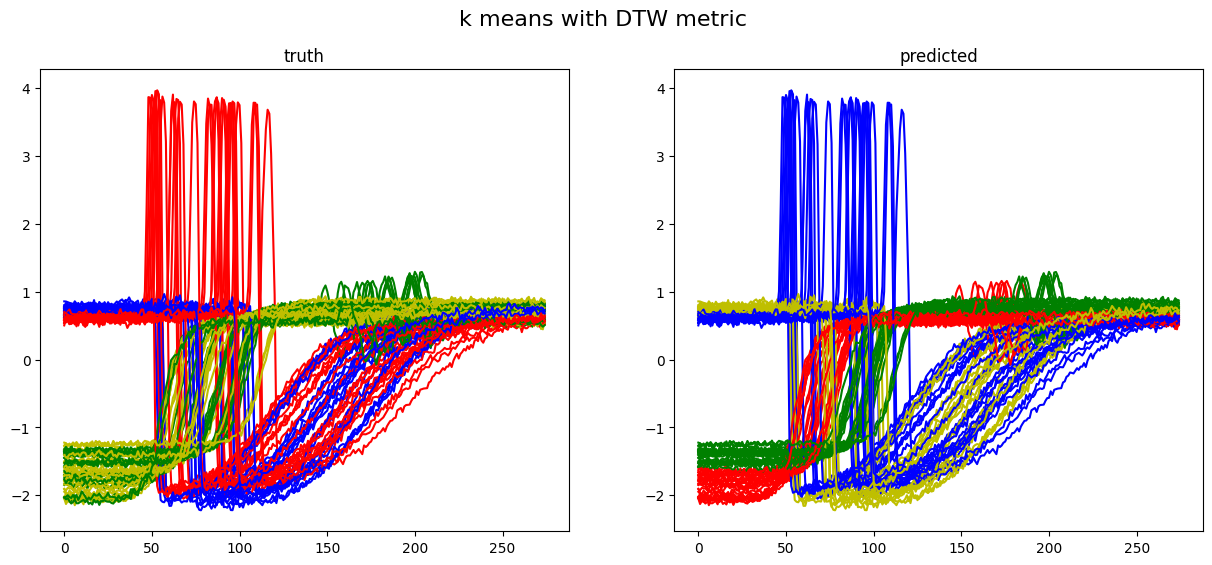

In [77]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('k means with DTW metric', fontsize=16)
ax1.set_title('truth')
ax2.set_title('predicted')
for i in range(len(tsdata)):
    ax1.plot(tsdata[i], color=list_col[classes[i]-1])
    ax2.plot(tsdata[i], color=list_col[pred_lab_dtw[i]-1])

Cette dernière méthode semble plus appropriée et semble bien discriminer les types de variations.

Pour citer le site de tslearn : "In this example, time series are preprocessed using TimeSeriesScalerMeanVariance. This scaler is such that each output time series has zero mean and unit variance. The assumption here is that the range of a given time series is uninformative and one only wants to compare shapes in an amplitude-invariant manner (when time series are multivariate, this also rescales all modalities such that there will not be a single modality responsible for a large part of the variance). This means that one cannot scale barycenters back to data range because each time series is scaled independently and there is hence no such thing as an overall data range."

In [78]:
tsdata_std = TimeSeriesScalerMeanVariance().fit_transform(tsdata)

Nous pouvons maintenant réessayer les méthodes vues précédemment afin de vérifier que nous ne avons pas écarté trop rapidement.

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    5.4s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    7.0s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    8.8s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:   10.7s


Init 1
127.600 --> 68.072 --> 68.780 --> 66.451 --> 55.973 --> 44.848 --> 43.051 --> 42.364 --> 42.263 --> 42.263 --> 
Init 2
129.378 --> 56.289 --> 54.480 --> 54.083 --> 53.481 --> 52.387 --> 52.169 --> 51.917 --> 51.300 --> 50.992 --> 50.603 --> 50.295 --> 49.907 --> 49.907 --> 
Init 3
135.529 --> 82.247 --> 50.430 --> 44.097 --> 42.263 --> 42.263 --> 
Init 4
123.426 --> 56.803 --> 56.276 --> 55.819 --> 55.759 --> 54.949 --> 52.258 --> 48.559 --> 45.058 --> 43.025 --> 42.263 --> 42.263 --> 
Init 5
129.191 --> 68.030 --> 43.246 --> 42.291 --> 42.263 --> 42.263 --> 
Init 6
Resumed because of empty cluster
Init 6
Resumed because of empty cluster
Init 6
Resumed because of empty cluster
Init 6
123.058 --> 59.091 --> 49.702 --> 43.767 --> 42.291 --> 42.263 --> 42.263 --> 
Init 7
128.099 --> 44.789 --> 42.704 --> 42.364 --> 42.263 --> 42.263 --> 
Init 8
118.979 --> 51.756 --> 44.487 --> 43.051 --> 42.364 --> 42.263 --> 42.263 --> 
Init 9
Resumed because of empty cluster
Init 9
131.827 --> 8

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s


2.536 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s


0.688 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s


0.688 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s


0.688 --> 
Init 2


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s


1.848 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s


0.504 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s


0.503 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s


0.503 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s


ValueError: not enough values to unpack (expected 4, got 2)

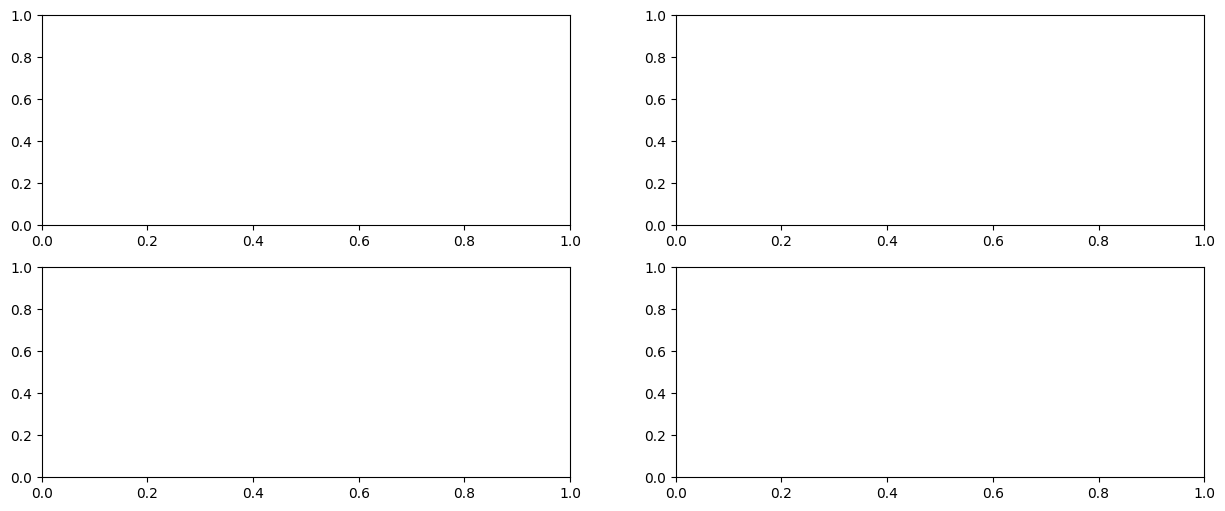

In [79]:
gak_km = KernelKMeans(n_clusters=4,
                      kernel="gak",
                      kernel_params={"sigma": "auto"},
                      n_init=40,
                      verbose=True)
km = TimeSeriesKMeans(n_clusters=4, verbose=True)
km_dtw = TimeSeriesKMeans(n_clusters=4,
                          n_init=2,
                          metric="dtw",
                          verbose=True,
                          max_iter_barycenter=10)

pred_lab_kern_std = gak_km.fit_predict(tsdata_std)
pred_lab_km_std = km.fit_predict(tsdata_std)
pred_lab_dtw_std  = km_dtw.fit_predict(tsdata_std)

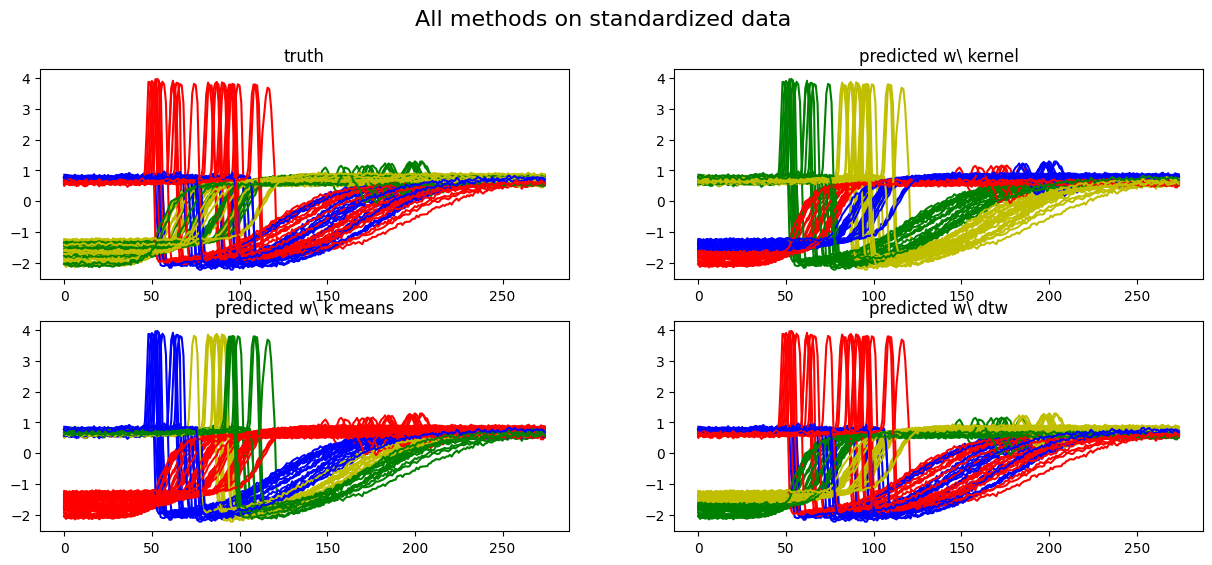

In [88]:
fig, [[ax1, ax2],[ax3, ax4]] = plt.subplots(2, 2, figsize=(15, 6))
fig.suptitle('All methods on standardized data', fontsize=16)
ax1.set_title('truth')
ax2.set_title('predicted w\ kernel')
ax3.set_title('predicted w\ k means')
ax4.set_title('predicted w\ dtw')

for i in range(len(tsdata_std)):
    ax1.plot(tsdata_std[i], color=list_col[classes[i]-1])
    ax2.plot(tsdata_std[i], color=list_col[pred_lab_kern_std[i]-1])
    ax3.plot(tsdata_std[i], color=list_col[pred_lab_km_std[i]-1])
    ax4.plot(tsdata_std[i], color=list_col[pred_lab_dtw_std[i]-1])

In [89]:
sdtw_km = TimeSeriesKMeans(n_clusters=4,
                           metric="softdtw",
                           metric_params={"gamma": .01},
                           verbose=True)
pred_lab_sdtw = sdtw_km.fit_predict(tsdata_std)

7.955 --> 9.459 --> 9.542 --> 9.630 --> 9.758 --> 9.757 --> 9.763 --> 9.767 --> 9.771 --> 9.769 --> 9.773 --> 9.771 --> 9.775 --> 9.773 --> 9.777 --> 9.776 --> 9.779 --> 9.777 --> 9.781 --> 9.779 --> 9.782 --> 9.780 --> 9.783 --> 9.781 --> 9.784 --> 9.783 --> 9.786 --> 9.784 --> 9.786 --> 9.785 --> 9.787 --> 9.786 --> 9.788 --> 9.787 --> 9.789 --> 9.786 --> 9.790 --> 9.789 --> 9.790 --> 9.790 --> 9.791 --> 9.791 --> 9.792 --> 9.791 --> 9.793 --> 9.792 --> 9.793 --> 9.792 --> 9.794 --> 9.793 --> 


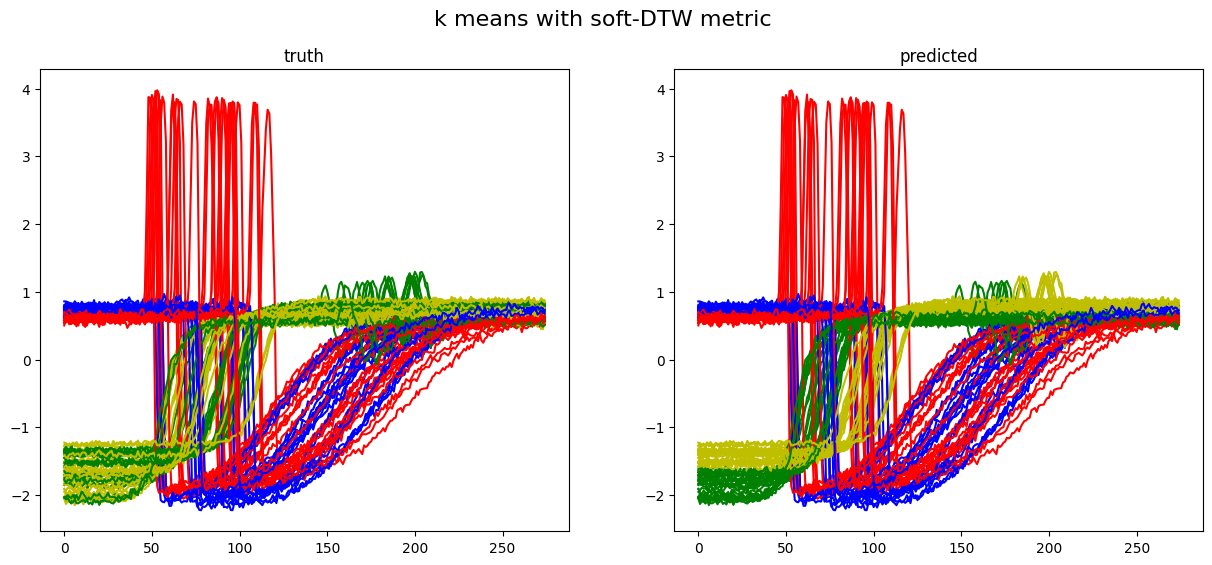

In [90]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('k means with soft-DTW metric', fontsize=16)
ax1.set_title('truth')
ax2.set_title('predicted')
for i in range(len(tsdata)):
    ax1.plot(tsdata_std[i], color=list_col[classes[i]-1])
    ax2.plot(tsdata_std[i], color=list_col[pred_lab_sdtw[i]-1])

Cette approche avce le clustering s'avère intéressante mais il faut être capable de chercher et de distinguer des groupes, du moins dans notre problématique. Pour le cas qui nous intéresse, nous cherchons surtout les données étant les plus "normales". Pour ce faire, il pourrait être intéressant de tester les mesures de profondeurs, *Depth measure*.

Pour utiliser la mesure de profondeur, nous utiliserons le package *skfda*, présentant le module *skfda.exploratory.depth*.

In [91]:
import skfda

In [112]:
data_matrix = [[2, 2, 1.5, 1  , 0.5, 0   , -0.4, -0.9, -1.5, -2, -2],
               [2, 2, 1.7, 1.2, 0.7, 0.3 , -0.6, -1.1, -1.7, -2, -2],
               [2, 2, 1.8, 1.3, 0.9, 0.2 , -0.8, -1  , -1.8, -2, -2],
               [2, 2, 1.6, 1  , 0.5, -0.2, -0.8, -1.3, -1.9, -2, -2],
               [2, 2, 1.5, 1.2, 0.7, 0.3 , -0.6, -1  , -1.7, -2, -2],
               [2, 2, 1.6, 1.2, 0.8, 0.1 , -0.4, -1  , -1.3, -2, -2],
               [2, 2, 1  , 0.5, 0.4, -0.1, -0.8, -1.2, -1.6, -2, -2],
               [2, 2, 2.3, 1.5, 1  , 0.2 , -0.2, -0.9, -1  , -2, -2],
               [2, 2, 2  , 1.5, 1.1, 0.7 , 0.4 , -0.5, -1  , -2, -2],
               [2, 2, 1.7, 0.8, 0.4, 0   , -0.4, -0.9, -1.3, -2, -2],
               [2, 2, 1.8, 1.5, 0.8, 0.1 , -0.2, -1.1, -1.8 , -2, -2],
               [2, 2, 1.7, 1.2, 0.6, 0.1 , -0.7, -0.9, -1.5, -2, -2],
               [2, 2, 1.9, 1.2, 0.6, 0   , -0.7, -1  , -1.5, -2, -2]]

grid_points = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

fd = skfda.FDataGrid(data_matrix, grid_points)

depth = skfda.exploratory.depth.ModifiedBandDepth()

values = depth(fd)

values.round(2)

array([0.73, 0.75, 0.71, 0.56, 0.77, 0.81, 0.53, 0.63, 0.49, 0.69, 0.7 ,
       0.81, 0.8 ])

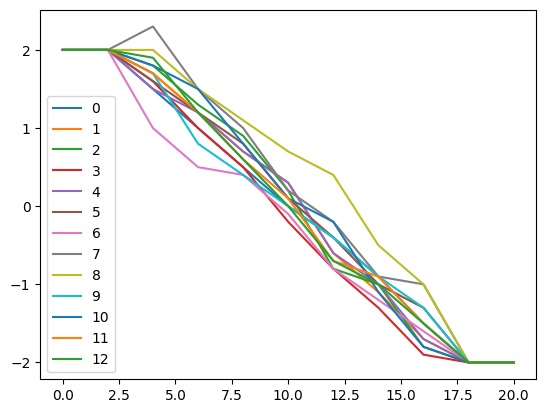

In [113]:
for i in range(len(data_matrix)):
    plt.plot(grid_points, data_matrix[i], label = str(i))
plt.legend(loc='lower left')
plt.show()

In [114]:
thres_75 = numpy.quantile(values, 0.75)

In [115]:
values > thres_75

array([False, False, False, False, False,  True, False, False, False,
       False, False,  True,  True])

Ceux qui sont labélisés True, sont ceux que l'on va considéré comme clean, "normal data". Les autres seront donnés à manger à l'algo que l'on va développé plus tard ! (indice : auto-encodeurs !)

In [194]:
clean = [i for i in range(len(values)) if values[i] > thres_75]    # indices associés aux courbes saines

Sur un ensemble de 600 time series, je récupère les 25% les plus profonds, *i.e.* 600*.25 = 150 time series ! Plutôt honnête ! Si l'on souhaite être très prudent, nous pouvons changer le seuil à 15%.

On va essayer de générer un ensemble de données avec cette forme là (pas envie de tout faire à la main)

In [332]:
# forme de base

base = [2, 2, 2, 2, 2, 2, 2, 2, 1.7, 1.3, 1, 0.5, 0, -0.5, -1, -1.5, -2, -2, -2, -2, -2, -2, -2, -2]
base_sm = savgol_filter(base, 5, 3)
grid = numpy.arange(0, 24, 1, dtype=int)


base2 = [1.1, 1.15, 1.2, 1.25, 1.6, 2.3, 2.8, 3.0, 3.6, 4.1, 3.9, 2.8, 2.4, 2.2, 2.1, 2.0, 1.9, 1.8, 1.75, 1.7, 1.65, 1.6, 1.55, 1.5]
base2_sm = savgol_filter(base2, 5, 3)

In [333]:
def generate_new_series(base_chosen) :
    
    """generate a new series with same shape as the one used as base"""

    new_rdm_series = []
    
    for i in range(len(grid)):
        if (i < 6) & (base_chosen[0] == 2):
            new_rdm_series.append(2)
        elif (i > 17) & (base_chosen[0] == 2):
            new_rdm_series.append(-2)
        else :
            new_rdm_series.append(numpy.random.normal(base_chosen[i], 0.07))

    new_rdm_series_smooth = savgol_filter(new_rdm_series, 5, 3)

    return new_rdm_series_smooth

In [390]:
gen_data = []
for i in range(1000):
    gen_data.append(generate_new_series(base_sm))

gen_data2 = []
for i in range(1000):
    gen_data2.append(generate_new_series(base2_sm))

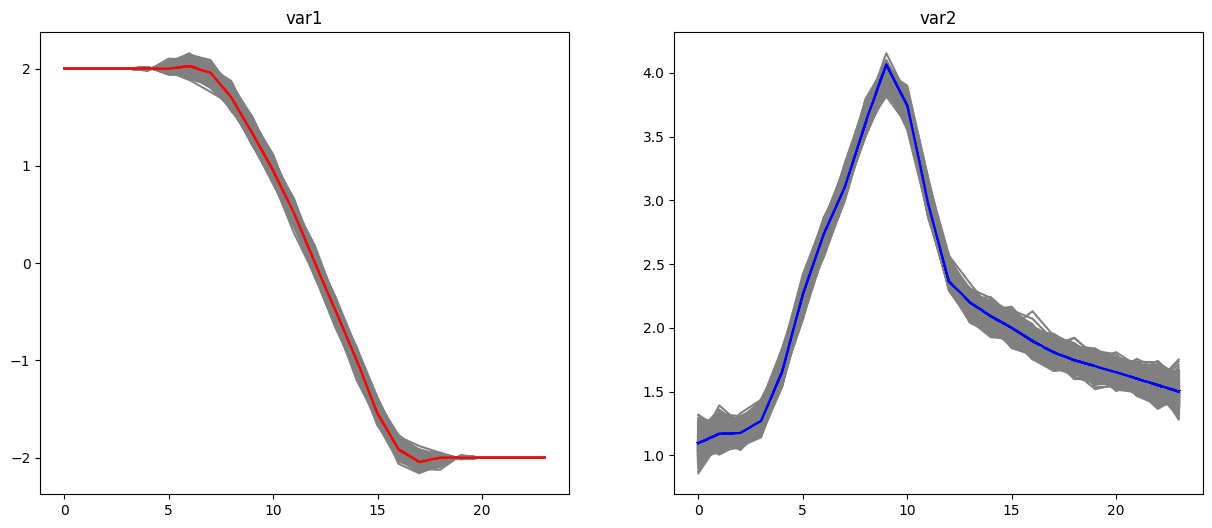

In [391]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
ax1.set_title('var1')
ax2.set_title('var2')
for i in range(1000):
    ax1.plot(grid, gen_data[i], c='grey')
    ax1.plot(grid, base_sm, c='r', label='base')
    ax2.plot(grid, gen_data2[i], c='grey')
    ax2.plot(grid, base2_sm, c='b', label='base2')

In [400]:
fd1 = skfda.FDataGrid(gen_data, grid)
depth1 = skfda.exploratory.depth.ModifiedBandDepth()
values1 = depth(fd1)

fd2 = skfda.FDataGrid(gen_data2, grid)
depth2 = skfda.exploratory.depth.ModifiedBandDepth()
values2 = depth(fd2)

In [401]:
thres_1 = numpy.quantile(values1, 0.75)
thres_2 = numpy.quantile(values2, 0.75)

In [403]:
clean = [i for i in range(len(values1)) if values1[i] > thres_1]
print(clean)

clean2 = [i for i in range(len(values2)) if values2[i] > thres_2]
print(clean2)

[3, 4, 5, 6, 18, 24, 27, 30, 31, 39, 41, 44, 48, 50, 62, 64, 80, 83, 84, 86, 87, 95, 100, 101, 104, 105, 106, 107, 122, 124, 125, 132, 135, 143, 148, 150, 153, 158, 161, 167, 174, 179, 196, 199, 205, 207, 211, 214, 215, 216, 217, 222, 228, 232, 241, 245, 249, 252, 256, 257, 262, 263, 265, 266, 270, 272, 276, 284, 288, 290, 293, 297, 303, 308, 311, 312, 316, 319, 321, 328, 329, 332, 336, 338, 342, 345, 349, 355, 358, 359, 361, 367, 376, 378, 380, 391, 396, 399, 413, 420, 422, 423, 424, 428, 430, 431, 432, 440, 441, 446, 448, 452, 453, 455, 463, 464, 466, 467, 472, 476, 477, 480, 481, 486, 490, 491, 493, 494, 497, 500, 504, 507, 519, 523, 526, 537, 549, 551, 553, 557, 560, 562, 566, 567, 570, 571, 574, 575, 596, 611, 612, 621, 626, 634, 639, 640, 641, 642, 643, 648, 649, 651, 652, 655, 658, 659, 660, 666, 668, 670, 672, 673, 676, 679, 681, 685, 687, 688, 700, 701, 702, 708, 714, 715, 720, 721, 725, 726, 727, 729, 732, 743, 745, 749, 751, 753, 755, 769, 772, 777, 780, 783, 785, 786, 791, 

In [404]:
list_color1 = ['g' if values1[i] > thres_1 else 'gainsboro' for i in range(len(values1))]
list_color2 = ['b' if values2[i] > thres_2 else 'gainsboro' for i in range(len(values2))]

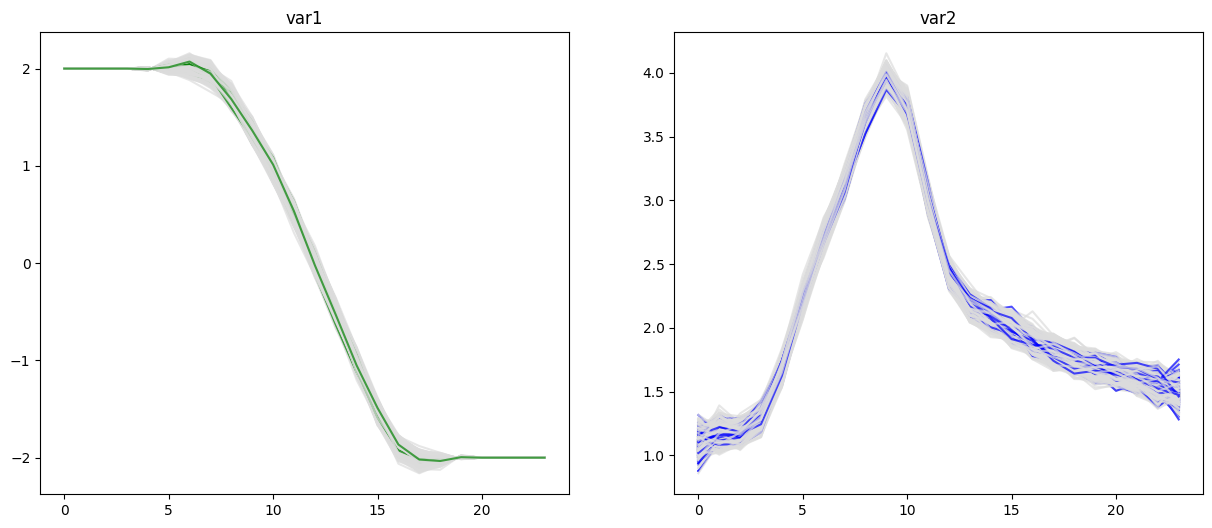

In [405]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
ax1.set_title('var1')
ax2.set_title('var2')
for i in range(1000):
    ax1.plot(grid, gen_data[i], c=list_color1[i], alpha=0.7)
    ax2.plot(grid, gen_data2[i], c=list_color2[i], alpha=0.7)

In [406]:
cm = list(set(clean).intersection(clean2))

In [407]:
len(cm)

61

Nous gardons ces 61 courbes comme références saines.

In [408]:
sazsd

NameError: name 'sazsd' is not defined

In [263]:
clean_data = [] 
for i in clean:
    clean_data.append(gen_data[i])

In [264]:
len(clean_data)

100

Nous avons pu réupérer les données étant considérées comme les plus profondes, i.e. les plus représentatives. Nous pouvons ensuite les réutiliser pour mettre au point un petit algorithme de détection d'anomalie sur les nouvelles données que nous lui fournirons.

De quoi avons nous besoin ? Quel algorithme choisir ? 
Nous cherchons à résoudre un problème ,d détection de courbes dites anormales afin d'améliorer un processus de surveillance opérationelle. Nous avons réussi à extraire des données qui semblent être les plus représentatifs de notre jeu de données, cependant il se peut que des anomalies s'y soient glissées (malgré notre prudence vis-à-vis du choix du seuil).
Les données sont corrélées entre elles, puisque nous étudions une étuve à la fois, les paramètres de l'étuve (i.e. temprature pression exercées) sont dépendantes, surtout entre deux cycles à la suite.

De plus, nous souhaitons un algorithme permettant de prendre en compte le contexte multivarié et dynamique.

L'article suivant donne un typologie intéressante : Mohammed Ayalew Belay et al. *“Unsupervised Anomaly Detection for IoT-Based Multi-
variate Time Series: Existing Solutions, Performance Analysis and Future Directions”*. In:
Sensors 23.5 (2023). issn: 1424-8220. doi: 10.3390/s23052844. url: https://www.mdpi.com/1424-8220/23/5/2844.

https://www.mdpi.com/2673-4591/18/1/23

https://towardsdatascience.com/using-lstm-autoencoders-on-multidimensional-time-series-data-f5a7a51b29a1

https://paperswithcode.com/paper/mtgflow-unsupervised-multivariate-time-series

https://paperswithcode.com/paper/a-deep-neural-network-for-unsupervised

https://arxiv.org/pdf/1607.00148v2.pdf